In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

# Importing and manipulating the dataset 

In [2]:
# Creating the df from excel file
file = 'OSA_propio.csv'
df = pd.read_csv(file)
df.set_index("Patient", inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, P0002 to P0683
Data columns (total 10 columns):
Gender      637 non-null object
Age         637 non-null float64
IAH         637 non-null float64
Cervical    637 non-null float64
Weight      637 non-null float64
Height      637 non-null float64
BMI         637 non-null float64
Smoker      637 non-null object
Snorer      637 non-null object
Illness     637 non-null object
dtypes: float64(6), object(4)
memory usage: 54.7+ KB


In [4]:
df.Gender = df.Gender.astype('category')
df.Smoker = df.Smoker.astype('category')
df.Snorer = df.Snorer.astype('category')
df.Illness = df.Illness.astype('category')

# Bar Plot 

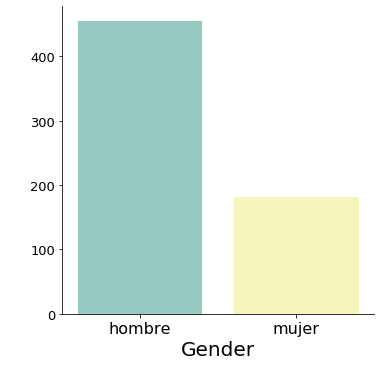

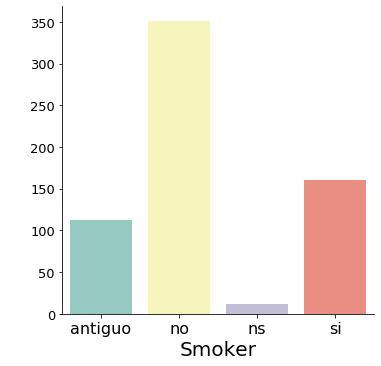

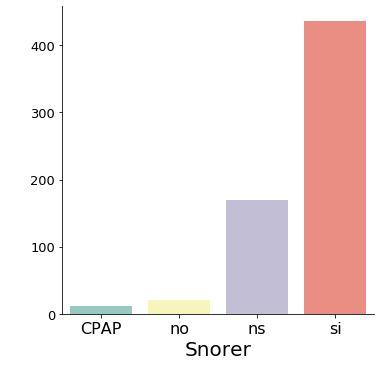

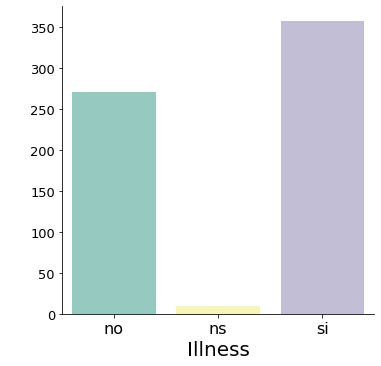

In [12]:
for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, palette="Set3")
        axes = fig.axes.flatten()
        axes[0].set_xlabel(col,fontsize=20)
        axes[0].set_ylabel(" ",fontsize=20)
        axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), fontsize = 16)
        axes[0].set_yticklabels(axes[0].get_ymajorticklabels(), fontsize = 13)        
        plt.show()

# Numeric Data Info

In [13]:
df.describe()

,Age,IAH,Cervical,Weight,Height,BMI
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,49.497645,20.392716,40.636578,87.733124,171.284144,29.863281
std,12.386418,18.596944,3.957542,18.356730,9.558128,5.619668
min,20.000000,0.000000,30.000000,45.000000,144.000000,18.290000
25%,40.000000,6.400000,38.000000,75.000000,165.000000,26.040000
50%,49.000000,14.400000,41.000000,86.000000,171.000000,28.730000
75%,59.000000,30.000000,43.000000,98.000000,178.000000,32.770000
max,88.000000,108.600000,53.000000,165.000000,197.000000,63.650000


# Boxplot

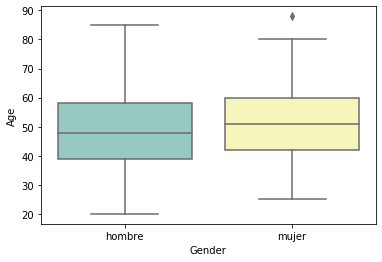

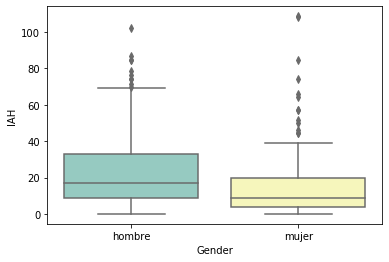

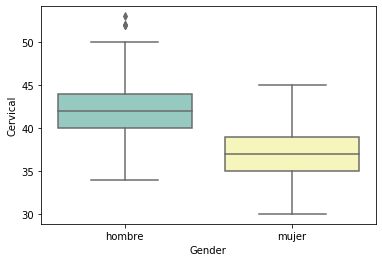

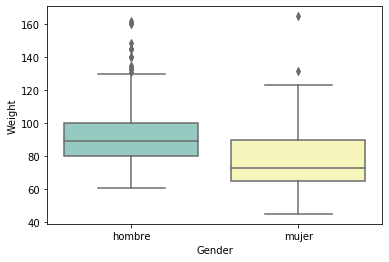

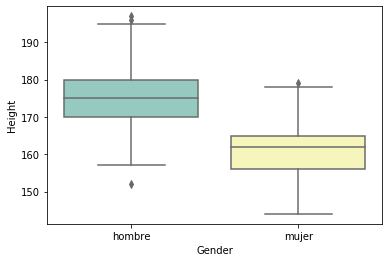

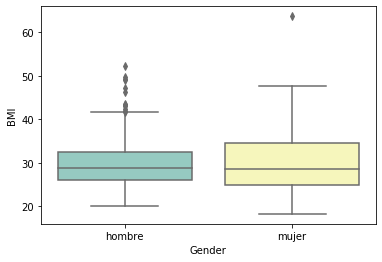

In [14]:
for col in df.select_dtypes(include='float64').columns:
    sns.boxplot(x="Gender", y=col, data=df, palette="Set3")
    plt.show()

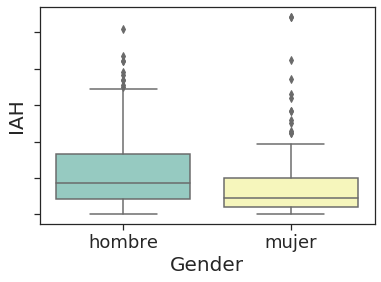

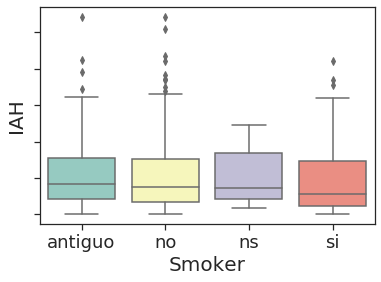

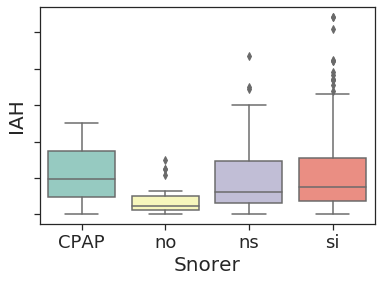

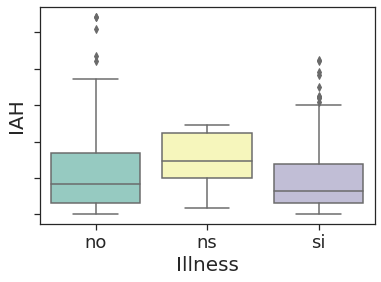

In [27]:
for col in df.select_dtypes(include='category').columns:
    hm = sns.boxplot(x=col, y="IAH", data=df, palette="Set3")
    hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18)
    hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)
    hm.set_xlabel(hm.get_xlabel(),fontsize=20)
    hm.set_ylabel(hm.get_ylabel(),fontsize=20)
    plt.show()

# Violin Plot

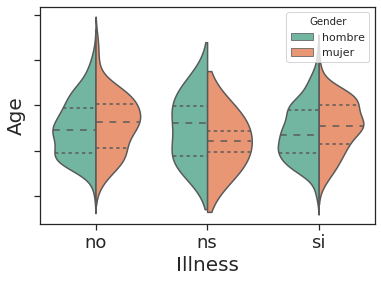

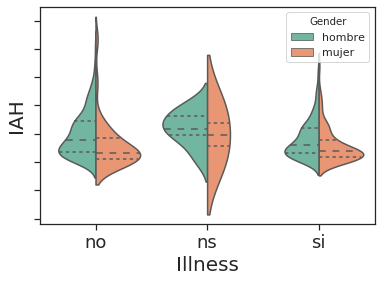

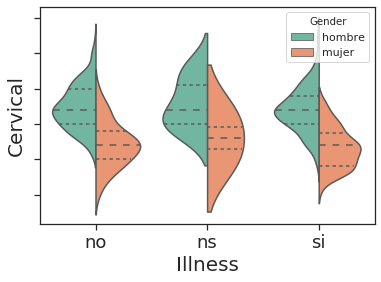

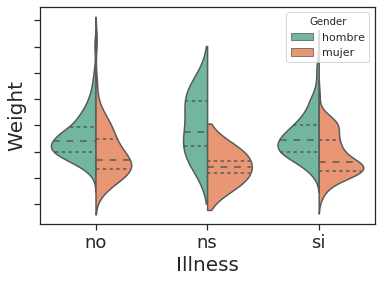

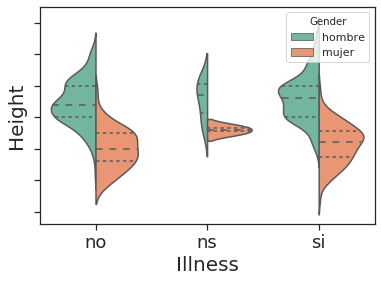

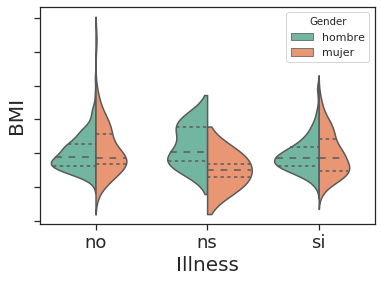

In [32]:
for col in df.select_dtypes(include='float64').columns:
    hm = sns.violinplot(x="Illness", y=col, hue="Gender", split=True, inner="quart", data=df, palette="Set2")
    hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18)
    hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)
    hm.set_xlabel(hm.get_xlabel(),fontsize=20)
    hm.set_ylabel(hm.get_ylabel(),fontsize=20)
    plt.show()

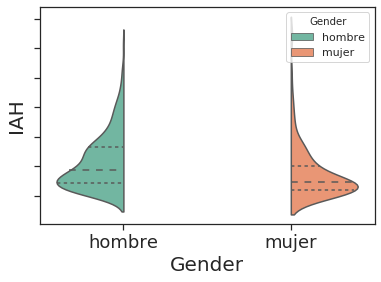

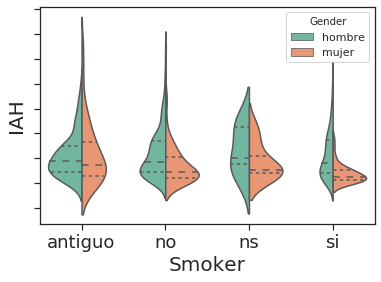

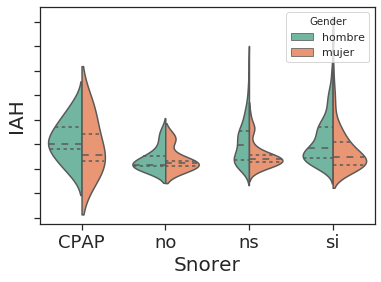

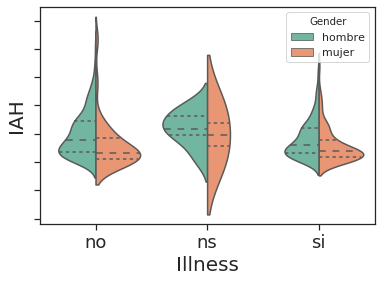

In [31]:
for col in df.select_dtypes(include='category').columns:
    hm = sns.violinplot(x=col, y='IAH', hue="Gender",
                   split=True, inner="quart", data=df,
                   palette="Set2")
    hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18)
    hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)
    hm.set_xlabel(hm.get_xlabel(),fontsize=20)
    hm.set_ylabel(hm.get_ylabel(),fontsize=20)
    plt.show()

# Scatter Matrix

[]

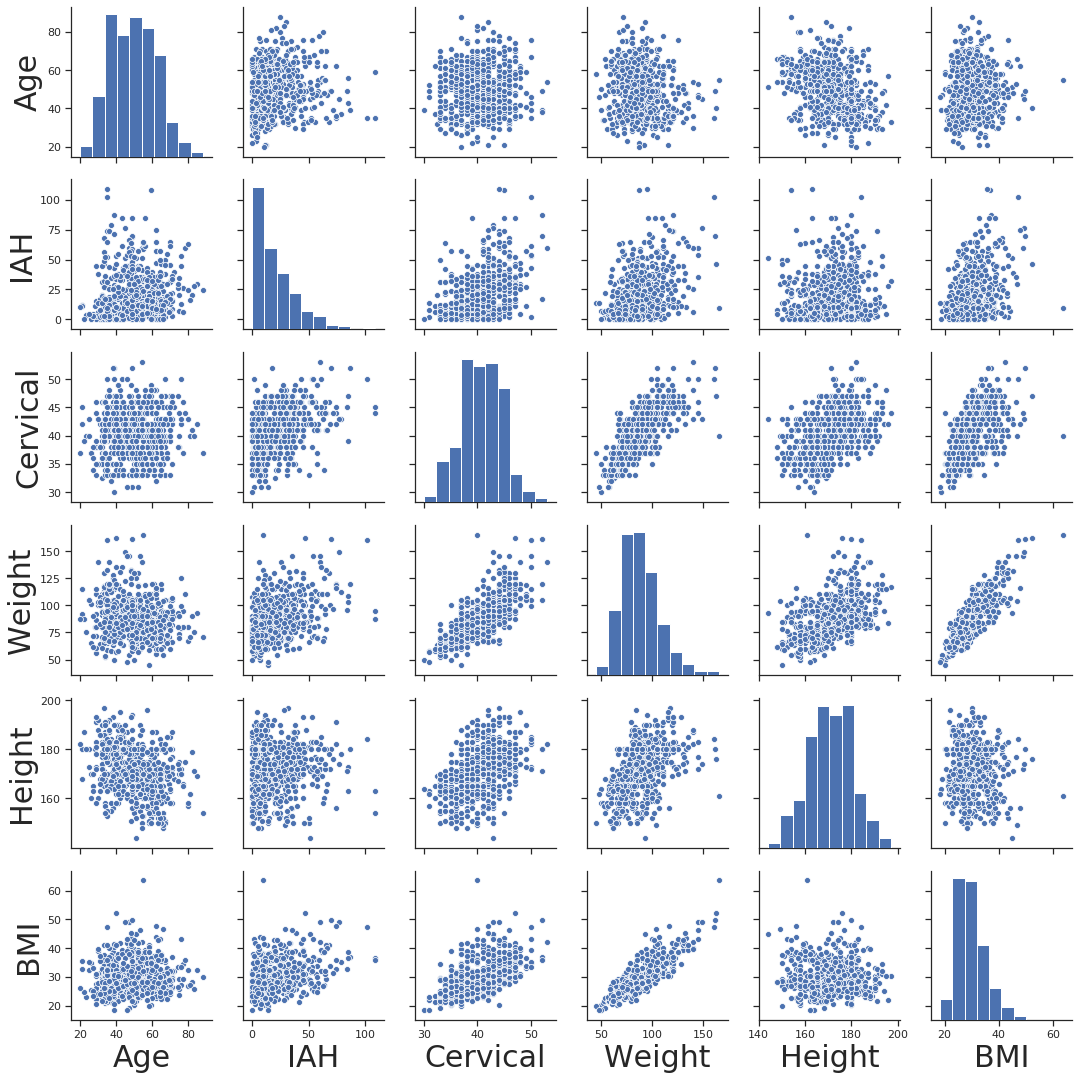

In [20]:
sns.set(style="ticks")
fig = sns.pairplot(df,palette="Set3")
axes = fig.axes.flatten()
for ax in axes:
    ax.set_xlabel(ax.get_xlabel(),fontsize=30)
    ax.set_ylabel(ax.get_ylabel(),fontsize=30)
plt.plot()

[]

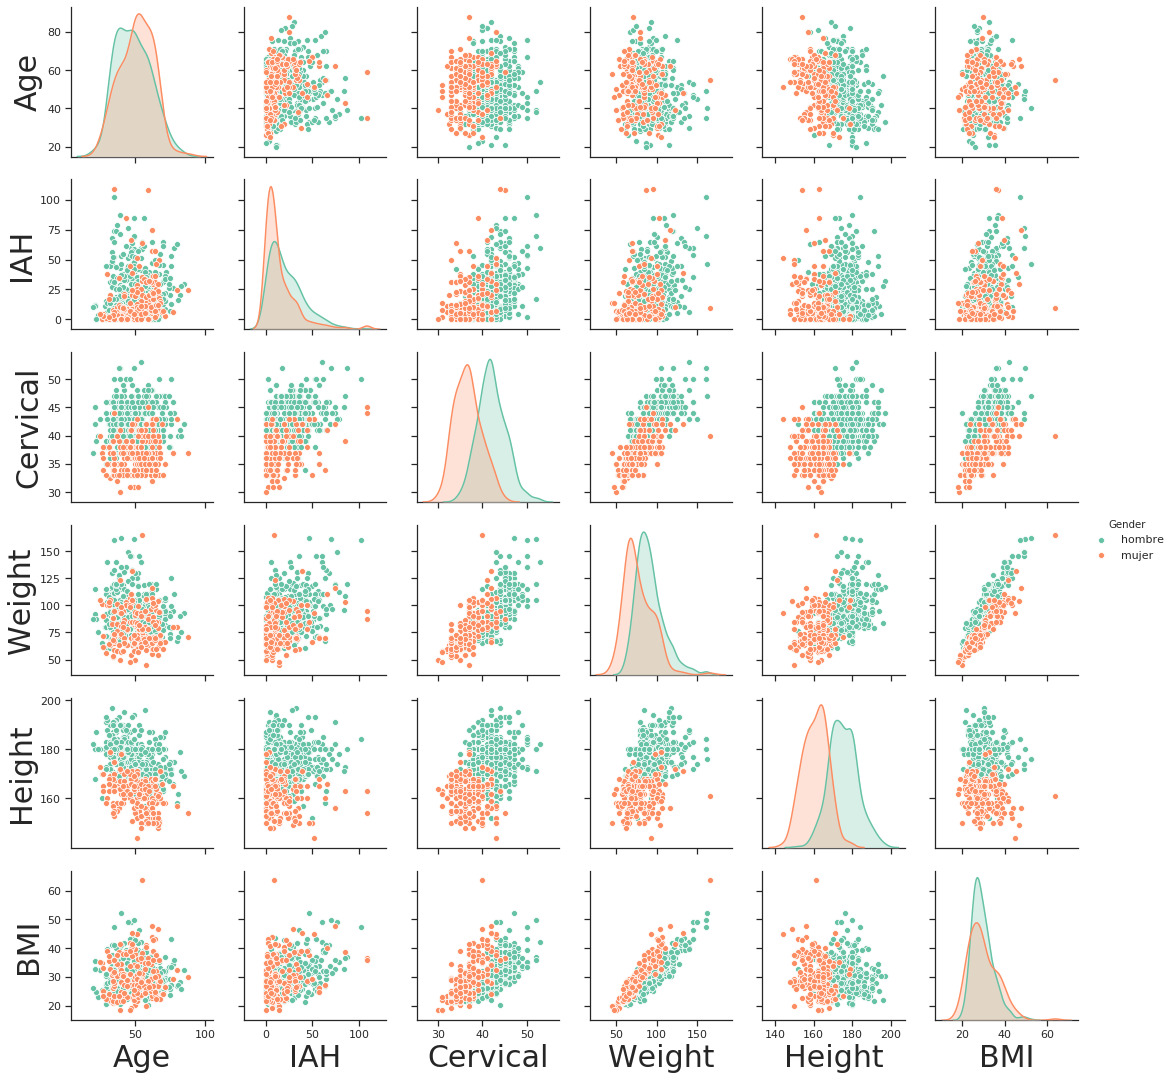

In [28]:
fig = sns.pairplot(df, hue="Gender", palette="Set2")
axes = fig.axes.flatten()
for ax in axes:
    ax.set_xlabel(ax.get_xlabel(),fontsize=30)
    ax.set_ylabel(ax.get_ylabel(),fontsize=30)
plt.plot()

[]

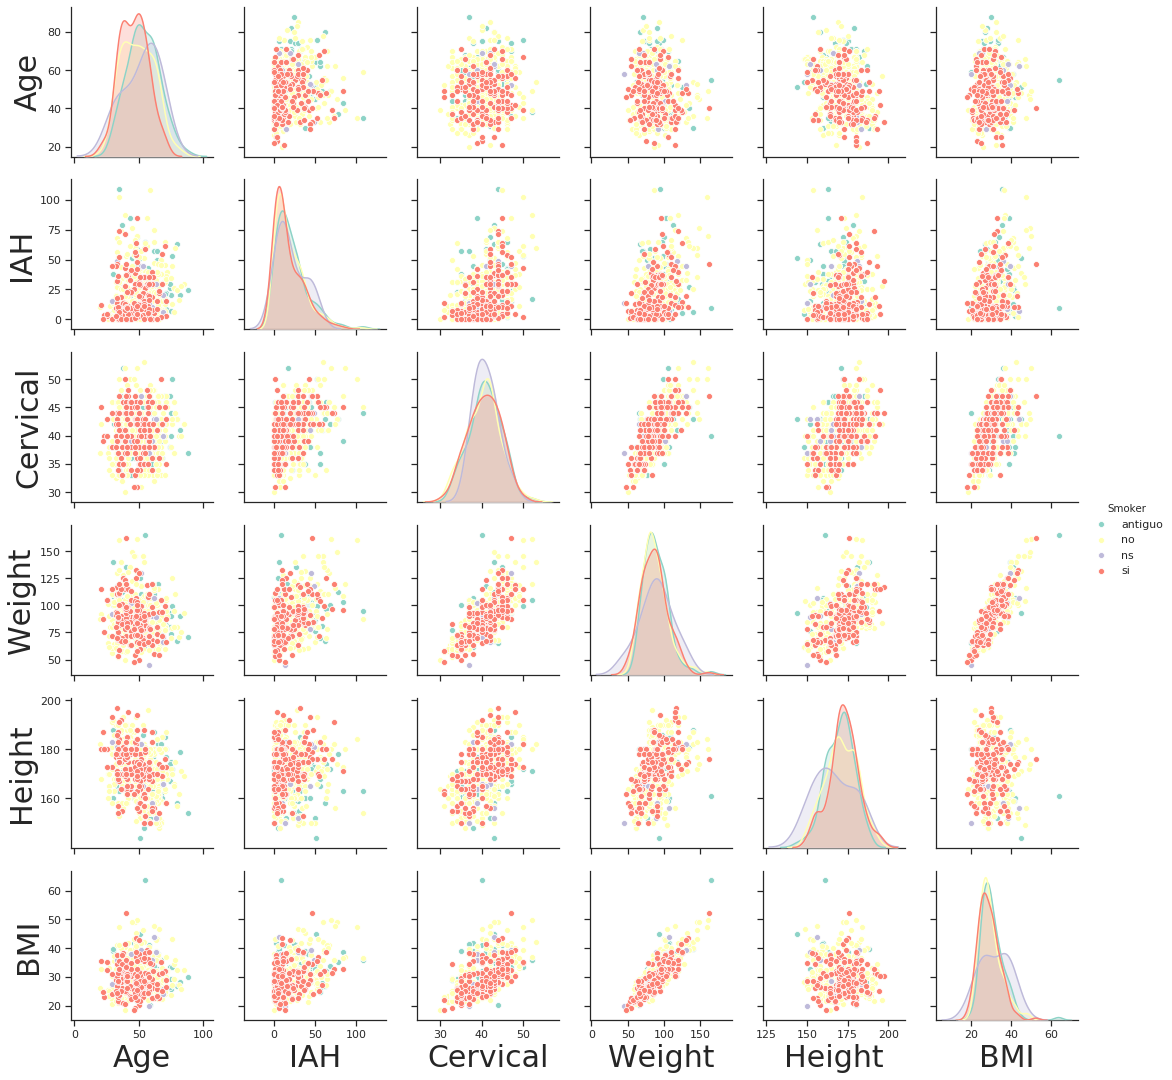

In [29]:
fig = sns.pairplot(df, hue="Smoker", palette="Set3")
axes = fig.axes.flatten()
for ax in axes:
    ax.set_xlabel(ax.get_xlabel(),fontsize=30)
    ax.set_ylabel(ax.get_ylabel(),fontsize=30)
plt.plot()

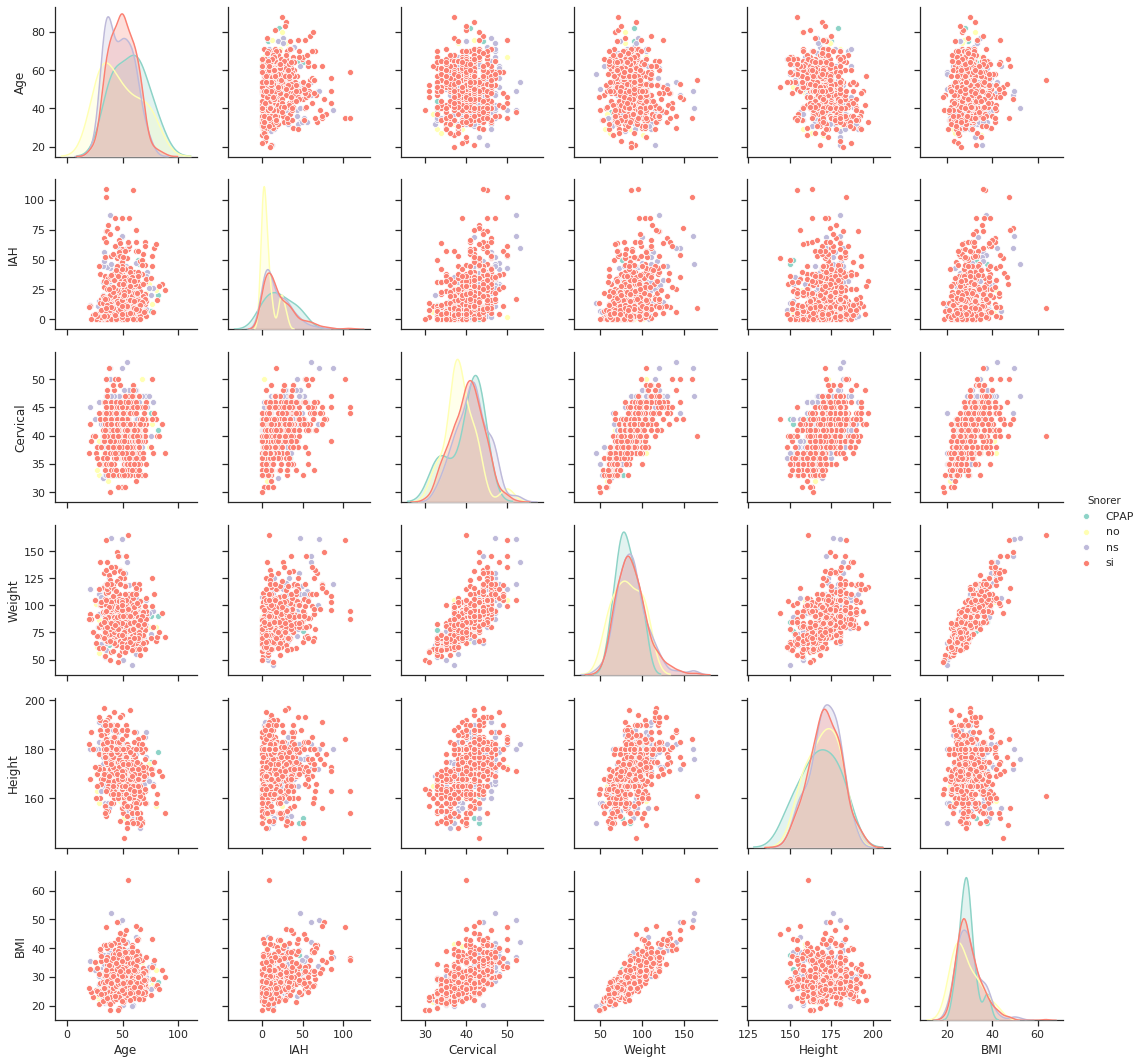

In [123]:
sns.pairplot(df, hue="Snorer", palette="Set3")

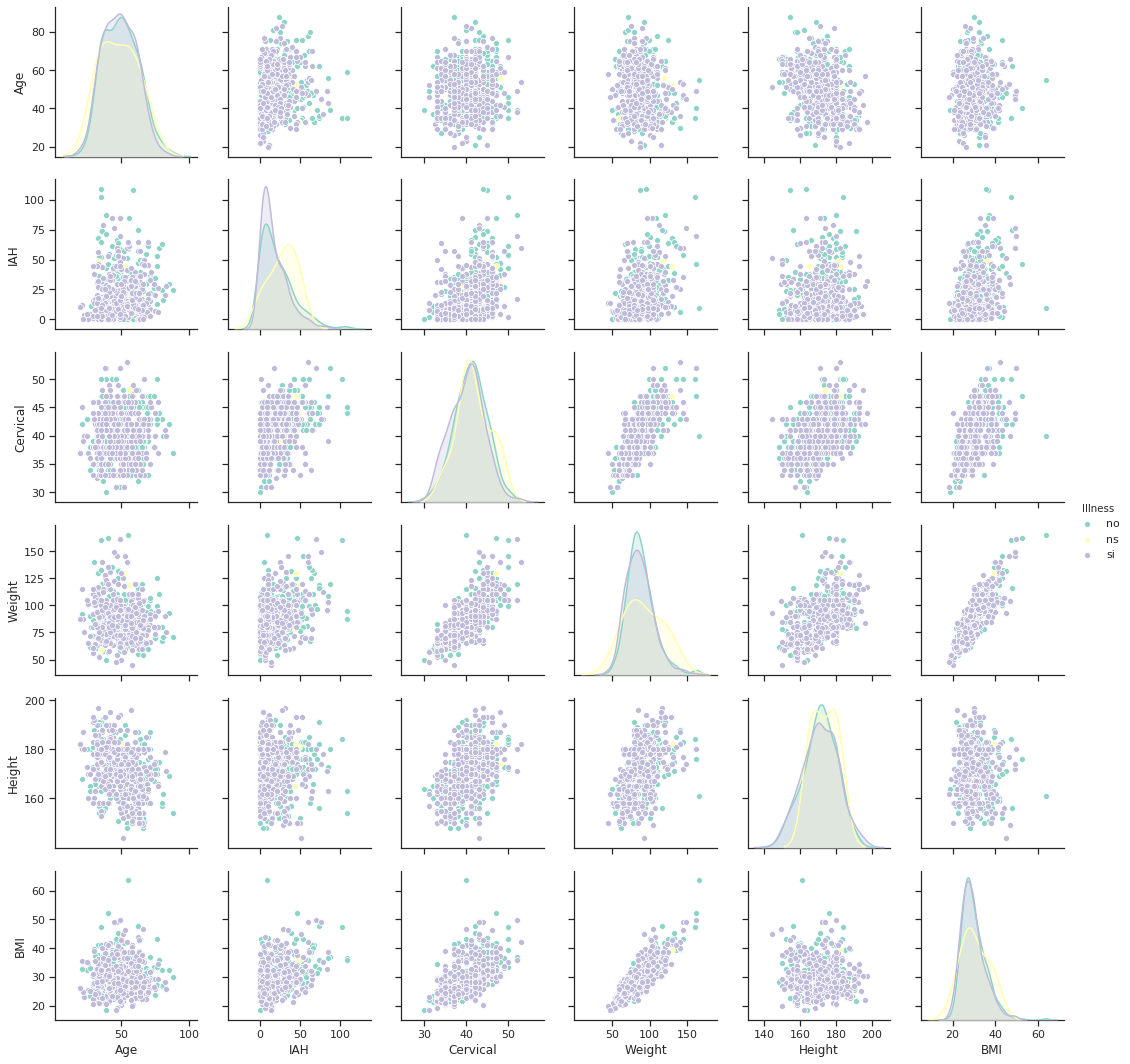

In [124]:
sns.pairplot(df, hue="Illness", palette="Set3")

# Heatmap

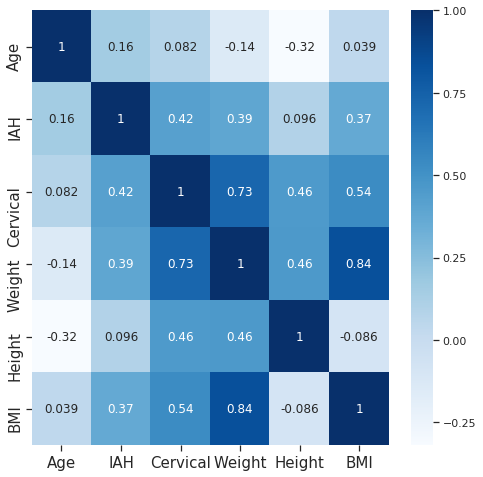

In [24]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(df.corr(),cmap="Blues", annot=True)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 15)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 15)        
plt.show()